# Baseline
Let's train a simple Logistic Regression with defaults as a baseline model.
Note that we use sample weights in training and evaluating.

In [14]:
from preprocess import *

In [15]:
import pandas as pd
path_to_data = 'census-income.data'
path_to_columns = 'census-income.columns'
df,var_cont,var_disc = load_for_training(path_to_data, path_to_columns, make_dummies=False)

In [16]:
# start by making a train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     random_state=7,
                                     test_size=0.20,
                                     shuffle=True,
                                     stratify=df['label_encoded'])

In [17]:
# split inputs, outputs, and weights
x_train, y_train, w_train = df_train.drop(columns=['label_encoded', 'instance weight']), df_train['label_encoded'], df_train['instance weight']
x_test, y_test, w_test = df_test.drop(columns=['label_encoded', 'instance weight']), df_test['label_encoded'], df_test['instance weight']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


col_pipe = ColumnTransformer(
       # remainder='passthrough', # default is to drop other columns
        transformers=[
            ('std_scal', StandardScaler() , list(var_cont)),
            ('one_hot', OneHotEncoder(handle_unknown='ignore') , list(var_disc))
        ])

model = Pipeline(steps=[ ('col_transf', col_pipe), ('logreg', LogisticRegression()) ])
# pipe = Pipeline(steps=[
#     ('cols', col_pipe),
#     ('clf', LogisticRegression(penalty='l1')) ])

In [19]:
model.fit(x_train,y_train, logreg__sample_weight=w_train)

/anaconda3/envs/brats/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('col_transf',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('std_scal',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['wage per hour', 'age',
                                                   'weeks worked in year',
                                                   'dividends from stocks',
                                                   'capital gains',
                                                   'capital losses',
                                                   'num persons worked for '
                       

In [20]:
from sklearn.metrics import f1_score

print('Traning score is:')
f1_score(model.predict(x_train),y_train,sample_weight=w_train)

Traning score is:


0.49546050849929746

In [21]:
print('Testing score is:')
f1_score(model.predict(x_test),y_test,sample_weight=w_test)

Testing score is:


0.48682327135303777

# PCA
Before trying another model, let's play with PCA a bit.
Let's start with two components for visualization.

In [34]:
df_dummy,var_cont,var_disc = load_for_training(path_to_data, path_to_columns, make_dummies=True)

In [35]:
df_dummy_train, df_dummy_test = train_test_split(df_dummy,
                                     random_state=7,
                                     test_size=0.20,
                                     shuffle=True,
                                     stratify=df['label_encoded'])

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(df_dummy_train.drop(columns=['instance weight', 'label_encoded']))

Text(0, 0.5, 'component 2')

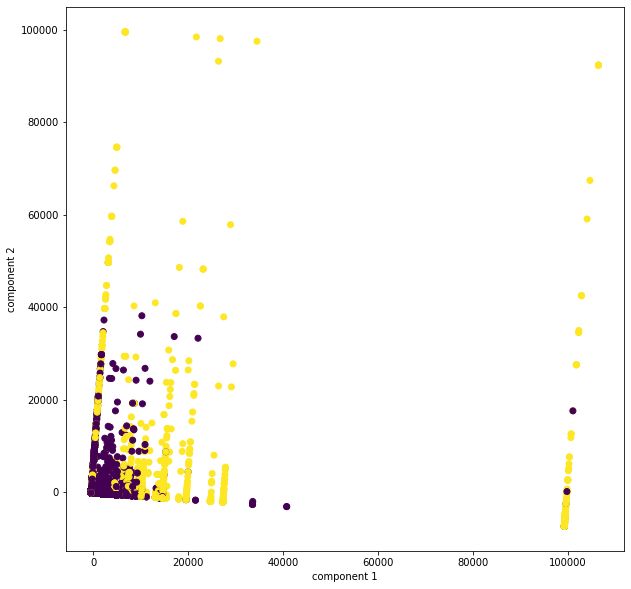

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_dummy_train['label_encoded'],
#             cmap=plt.cm.get_cmap('spectral', 10)
           )
plt.xlabel('component 1')
plt.ylabel('component 2')

Let's move on to feature selection.

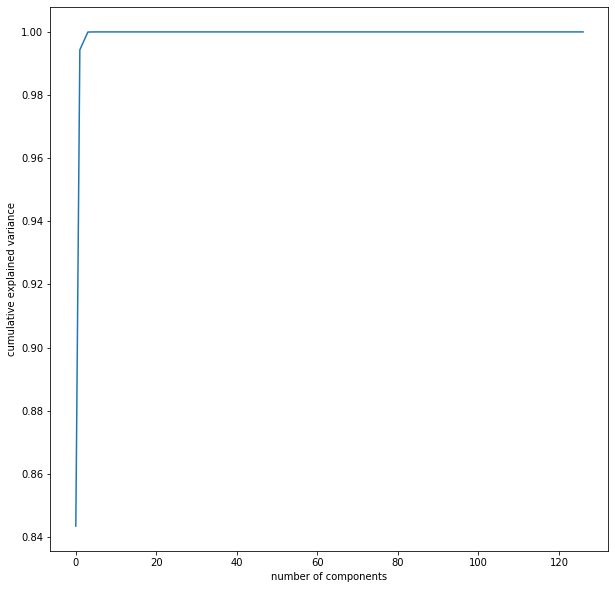

In [43]:
import numpy as np
pca = PCA().fit(df_dummy_train.drop(columns=['instance weight', 'label_encoded']))
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [52]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9942974188899795

PCA does not seem to be super useful, the first two components essentially explain all the variance.

In [53]:
# split inputs, outputs, and weights
x_train, y_train, w_train = df_train.drop(columns=['label_encoded', 'instance weight']), df_train['label_encoded'], df_train['instance weight']
x_test, y_test, w_test = df_test.drop(columns=['label_encoded', 'instance weight']), df_test['label_encoded'], df_test['instance weight']

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



col_pipe = ColumnTransformer(
       # remainder='passthrough', # default is to drop other columns
        transformers=[
            ('std_scal', StandardScaler() , list(var_cont)),
            ('one_hot', OneHotEncoder(handle_unknown='ignore') , list(var_disc))
        ])

model = Pipeline(steps=[ ('col_transf', col_pipe), ('randomforest', RandomForestClassifier(n_estimators=200)) ])
# pipe = Pipeline(steps=[
#     ('cols', col_pipe),
#     ('clf', LogisticRegression(penalty='l1')) ])

In [94]:
model.fit(x_train,y_train,randomforest__sample_weight=w_train)

Pipeline(memory=None,
         steps=[('col_transf',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('std_scal',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['wage per hour', 'age',
                                                   'weeks worked in year',
                                                   'dividends from stocks',
                                                   'capital gains',
                                                   'capital losses',
                                                   'num persons worked for '
                       

In [95]:
from sklearn.metrics import f1_score

print('Traning score is:')
f1_score(model.predict(x_train),y_train,sample_weight=w_train)

Traning score is:


0.98996128062211

In [96]:
print('Testing score is:')
f1_score(model.predict(x_test),y_test,sample_weight=w_test)

Testing score is:


0.5122404669603493

In [98]:
# 20 trees 49 f1 score
# 40 trees 50 f1 score
# 80 trees 51 f1 score
# 200 trees 51 f1 score

In [108]:
from sklearn.metrics import roc_auc_score

y_hat = model.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_hat)

0.9325767394775789

In [111]:
y_train_hat = model.predict_proba(x_train)[:,1]
roc_auc_score(y_train,y_train_hat)

0.9998462031284736

In [106]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_hat)



0.03253469150801062

In [107]:
model.score(x_test,y_test)

0.9513344192457086

In [116]:
y_hat = model.predict_proba(x_test)[:,1]
for t in [0.1,0.3,0.35,0.4,0.45,0.5,0.7]:
    y_pred = (y_hat > t)
    y_pred = y_pred.astype('int')
    fs = f1_score(y_test,y_pred)
    print(f"For threshold {t}, f1 score is {fs}")

For threshold 0.1, f1 score is 0.47299509001636664
For threshold 0.3, f1 score is 0.564976076555024
For threshold 0.35, f1 score is 0.5610915856936118
For threshold 0.4, f1 score is 0.5540450189436148
For threshold 0.45, f1 score is 0.5335546597106947
For threshold 0.5, f1 score is 0.5098435133770822
For threshold 0.7, f1 score is 0.3595858173831189


In [121]:
from sklearn.metrics import precision_recall_curve
def make_prec_rec_curve(y_test, y_hat, fig_size_x=8, fig_size_y=8, save_path=None):
#     from sklearn.metrics import precision_recall_curve
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     import numpy as np
    precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

    plt.figure(figsize=(fig_size_x,fig_size_y))
    plt.plot(precision, recall, label='precision recall curve')
    plt.xlabel("Precision = TP/(TP+FP) = TP/predicted positive")
    plt.ylabel("Recall = TP/(TP+FN) = TP/actually positive")

    t_half = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(precision[t_half],recall[t_half],'o',label="threshold = 1/2",fillstyle='none', markersize=10)

    plt.legend()
    sns.despine()

    if save_path:
        plt.savefig(save_path)


NameError: name 'sns' is not defined

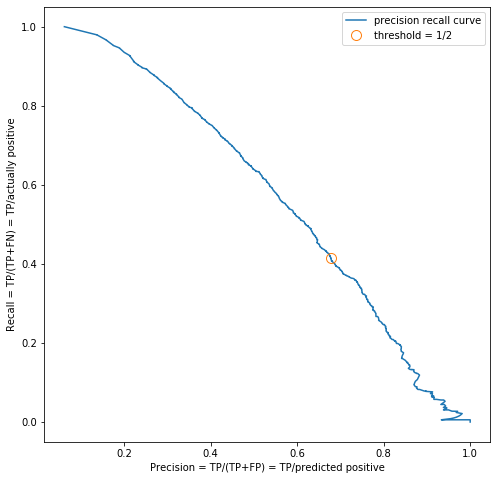

In [122]:
make_prec_rec_curve(y_test,y_hat)

In [129]:
def make_roc(y_test,y_hat,fig_size_x=8,fig_size_y=8,save_path=None):
    from sklearn.metrics import roc_curve
    import seaborn as sns
#     import numpy as np
#     import matplotlib.pyplot as plt
#     import seaborn as sns
    fpr, tpr, thresholds = roc_curve(y_test,y_hat)

    plt.figure(figsize=(fig_size_x,fig_size_y))
    plt.plot(fpr,tpr,label='ROC curve')
    plt.ylabel('TPR = TP/(TP+FN) = Recall')
    plt.xlabel('FPR = FP/(FP+TN)')

    t_half = np.argmin(np.abs(thresholds - 0.5))
    plt.plot(fpr[t_half],tpr[t_half], 'o', label='threshold = 1/2', fillstyle='none', markersize=10)

    plt.legend()
    sns.despine()
    
    if save_path:
        plt.savefig(save_path)


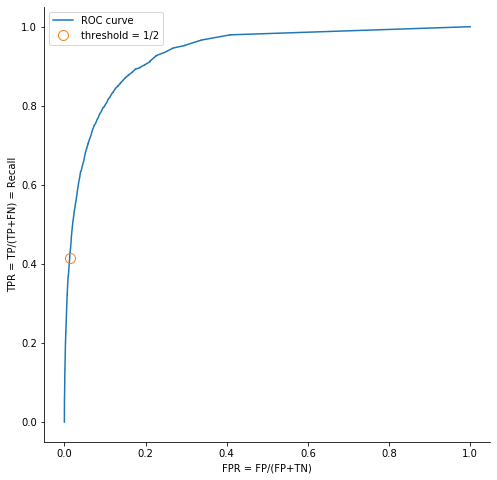

In [130]:
make_roc(y_test,y_hat)